In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.7 installed at /Users/cristian/Library/Python/3.9/lib/python/site-packages/camb


In [3]:
# Now get matter power spectra and sigma8 at redshift 0 and 0.8
# parameters can all be passed as a dict as above, or you can call 
# separate functions to set up the parameter object
pars =  camb.set_params(H0=68.0, ombh2=0.022, omch2=0.122, ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.5, 1.0, 1.5], kmax=100.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


TypeError: not all arguments converted during string formatting

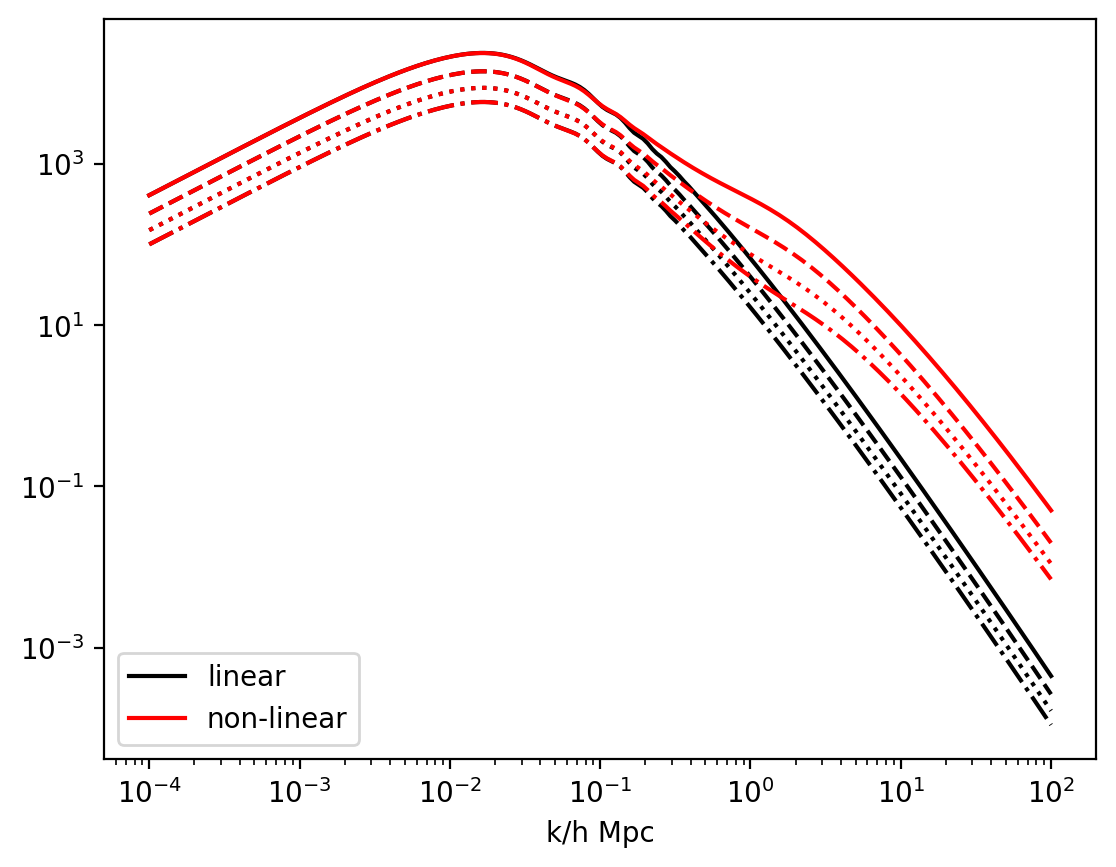

In [6]:
for i, (redshift, line) in enumerate(zip(z,['-','--', 'dotted', 'dashdot'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z=%s'%tuple(z));

In [11]:
np.savetxt("Pk_matter_z_0.txt", np.array([kh, pk[0,:]]).T)
#np.savetxt("Pk_matter_z_0.txt", np.array([kh, pk[0,:]]).T)